In [47]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import re 
import string
import nltk

from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize,sent_tokenize

from sklearn.model_selection import StratifiedKFold

import textblob

from textblob import TextBlob
from nltk.stem import PorterStemmer

In [77]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble

In [48]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
# importing dataset
bank = pd.read_excel('BankReviews.xlsx')

In [50]:
bank.head()

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [51]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
Date        505 non-null datetime64[ns]
Stars       505 non-null int64
Reviews     505 non-null object
BankName    505 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 15.9+ KB


In [52]:
TextBlob(bank['Reviews'][0]).detect_language()

'en'

# Basic Exploratory Analysis

In [53]:
df = bank.copy()

In [54]:
stops = set(stopwords.words('english'))
print(stops)

{'him', 'below', 'which', 'he', 'down', 'that', "couldn't", 'is', 'wouldn', 'about', 'she', "you've", 'our', 'or', 'should', 'what', 'those', 'during', 'they', 'in', 'why', 'herself', 'have', 'we', "don't", "wasn't", 'over', 'these', 'at', 'because', 'until', 'own', 'up', 'than', 'my', 'between', 'was', 'were', 'its', 'hasn', 'but', "mightn't", 'hers', 'any', 'other', 'now', 'off', 'm', 'weren', 'who', 'be', 'did', 'when', 'just', 'out', 'ours', 'didn', 'me', 'most', 't', "you're", 'such', 'again', 'being', 'hadn', "she's", 'through', 'doesn', 'by', 'wasn', 'only', "needn't", 'as', "wouldn't", 'ma', 'their', 'i', 'are', 'on', 'will', "hadn't", "should've", 'whom', 'it', 'above', 'itself', 'been', 've', 'ain', 'here', 'does', 'there', "mustn't", 'won', 'you', 'more', 'not', 'her', "doesn't", 'a', 'd', "aren't", 'ourselves', "hasn't", 'if', 'to', 'aren', "weren't", "you'll", 'had', 'same', 'then', 'can', 'after', 'no', 'o', 'shouldn', "won't", 'so', "that'll", 'yourselves', 'and', 'once'

In [55]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [56]:
df['Reviews'] = df['Reviews'].astype(str)
df['count_sent']=df["Reviews"].apply(lambda x: len(re.findall("\n",str(x)))+1)

#Word count in each comment:
df['count_word']=df["Reviews"].apply(lambda x: len(str(x).split()))

#Unique word count
df['count_unique_word']=df["Reviews"].apply(lambda x: len(set(str(x).split())))

#Letter count
df['count_letters']=df["Reviews"].apply(lambda x: len(str(x)))

#Word density

df['word_density'] = df['count_letters'] / (df['count_word']+1)

#punctuation count
df["count_punctuations"] =df["Reviews"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df["count_words_upper"] = df["Reviews"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#lower case words count
df["count_words_lower"] = df["Reviews"].apply(lambda x: len([w for w in str(x).split() if w.islower()]))

#title case words count
df["count_words_title"] = df["Reviews"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df["count_stopwords"] = df["Reviews"].apply(lambda x: len([w for w in str(x).lower().split() if w in stops]))

#Average length of the words
df["mean_word_len"] = df['Reviews'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

#Number of numeric
df['numeric'] = df['Reviews'].apply(lambda x :len([x for x in x.split() if x.isdigit()]))

#Number of alphanumeric
df['alphanumeric'] = df['Reviews'].apply(lambda x :len([x for x in x.split() if x.isalnum()]))

#Number of alphabetics
df['alphabetetics'] = df['Reviews'].apply(lambda x :len([x for x in x.split() if x.isalpha()]))

#Number of spaces
df['Spaces'] = df['Reviews'].apply(lambda x :len([x for x in x.split() if x.isspace()]))

#Number of Words ends with
df['words_ends_with_et'] = df['Reviews'].apply(lambda x :len([x for x in x.lower().split() if x.endswith('et')]))

#Number of Words ends with
df['words_start_with_no'] = df['Reviews'].apply(lambda x :len([x for x in x.lower().split() if x.startswith('no')]))

# Count the occurences of all words
df['wordcounts'] = df['Reviews'].apply(lambda x :dict([ [t, x.split().count(t)] for t in set(x.split()) ]))

pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

df['noun_count'] = df['Reviews'].apply(lambda x: check_pos_tag(x, 'noun'))
df['verb_count'] = df['Reviews'].apply(lambda x: check_pos_tag(x, 'verb'))
df['adj_count']  = df['Reviews'].apply(lambda x: check_pos_tag(x, 'adj'))
df['adv_count']  = df['Reviews'].apply(lambda x: check_pos_tag(x, 'adv'))
df['pron_count'] = df['Reviews'].apply(lambda x: check_pos_tag(x, 'pron')) 

In [57]:
df.head()

,Date,Stars,Reviews,BankName,count_sent,count_word,count_unique_word,count_letters,word_density,count_punctuations,...,alphabetetics,Spaces,words_ends_with_et,words_start_with_no,wordcounts,noun_count,verb_count,adj_count,adv_count,pron_count
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,1,19,19,126,6.300000,4,...,15,0,0,0,"{'Wyndham': 1, 'Great': 1, 'Thank': 1, 'move':...",8,3,1,1,3
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,1,25,23,159,6.115385,4,...,21,0,0,0,"{'Richardson': 1, 'Thank': 1, 'service,': 1, '...",7,3,4,2,4
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage,1,79,64,462,5.775000,8,...,73,0,0,1,"{'Wyndham': 3, 'viable': 1, 'Ed': 1, 'loan,': ...",24,10,5,8,8
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage,1,108,78,605,5.550459,9,...,101,0,0,1,"{'Ed': 1, 'that': 1, 'team': 2, 'our': 1, 'wha...",30,17,8,7,11
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage,1,59,47,341,5.683333,6,...,53,0,0,1,"{'Wyndham': 1, 'thorough': 1, 'service,': 1, '...",16,9,4,4,8


# Split the data into Train & Test

In [58]:
# define X and y
X = bank.Reviews
y = bank.Stars

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404,)
(101,)
(404,)
(101,)


### Tokenization

In [59]:
def tokenization(text):
    text=word_tokenize(text)
    return(text)

In [60]:
token_X_train = X_train.apply(lambda x: tokenization(x))
token_X_test = X_test.apply(lambda x: tokenization(x))

### POS Tagging

In [61]:
def pos_tagging(text):
    text = nltk.pos_tag(text)
    return(text)

In [62]:
pos_tag_X_train = token_X_train.apply(lambda x: pos_tagging(x))
pos_tag_X_test = token_X_test.apply(lambda x: pos_tagging(x))

### Basic Text Cleaning

In [63]:
def text_cleaning(text):
    text = text.lower()                                       # Convert text to lower case
    text = text.strip()
    text = re.sub(r' +',' ',text)                             # Replacing more than one spaces with a single space
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?$,'0-9]", "", text)  # Replacing special characters and numbers with none
    return text

In [64]:
X_train = X_train.apply(text_cleaning)
X_test = X_test.apply(text_cleaning)

### Stop word removal

In [65]:
def stop_word_removal(text):
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stops))   #Removing stop words
    text = text.apply(lambda x: str(TextBlob(x).correct()))                         # Correct spelling corrections
    return(text)

In [66]:
X_train=stop_word_removal(X_train)
X_test=stop_word_removal(X_test)

### Lemmatization

In [67]:
lemmatizer = WordNetLemmatizer()

In [68]:
def lemmatization(text):
    text = text.apply(lambda x: " ".join(lemmatizer.lemmatize(w) for w in x.split()))  
    return(text)

In [33]:
X_train = lemmatization(X_train)
X_test = lemmatization(X_test)

### Vectorization for Train only

In [69]:
#Train
count_vector = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1,1),min_df=5 , max_features=800)
count_vector = count_vector.fit(X_train)
X_train_count = count_vector.transform(X_train)

In [70]:
count_vector.get_feature_names()

['aaron',
 'able',
 'absolutely',
 'accept',
 'accommodation',
 'account',
 'accurate',
 'achieve',
 'across',
 'actual',
 'adam',
 'additional',
 'advice',
 'agent',
 'agreed',
 'all',
 'almost',
 'along',
 'already',
 'also',
 'always',
 'amazing',
 'american',
 'amount',
 'annoyed',
 'another',
 'answer',
 'answered',
 'answering',
 'answers',
 'anyone',
 'anything',
 'application',
 'apply',
 'appraisal',
 'appraise',
 'appreciate',
 'appreciated',
 'around',
 'ask',
 'asked',
 'asking',
 'asset',
 'assurance',
 'attention',
 'attorney',
 'available',
 'away',
 'awesome',
 'back',
 'bad',
 'balance',
 'bank',
 'banks',
 'based',
 'beat',
 'began',
 'beginning',
 'believe',
 'beneficial',
 'bent',
 'best',
 'better',
 'beyond',
 'big',
 'bob',
 'broker',
 'bryant',
 'business',
 'buy',
 'buyer',
 'buyers',
 'buying',
 'ca',
 'call',
 'called',
 'calling',
 'calls',
 'calm',
 'came',
 'can',
 'cannot',
 'capital',
 'card',
 'care',
 'cases',
 'causing',
 'certainly',
 'challenging',


In [71]:
dtm = X_train_count.toarray()
dtm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [72]:
df_x_train_dtm = pd.DataFrame(dtm,columns=count_vector.get_feature_names())
df_x_train_dtm.head()

,aaron,able,absolutely,accept,accommodation,account,accurate,achieve,across,actual,...,working,works,would,wouldn,writing,wrong,wyndham,year,years,yet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Examining the tokens and their counts

In [73]:
# count of each token
token_count = df_x_train_dtm.sum()
token_count

aaron             16
able              38
absolutely        11
accept             6
accommodation      5
account           14
accurate           8
achieve            5
across            10
actual             6
adam              39
additional        11
advice             6
agent             13
agreed             6
all               13
almost            15
along             13
already           12
also              38
always            71
amazing           26
american           6
amount            19
annoyed            5
another           22
answer            19
answered          19
answering         10
answers           11
                ... 
wait               7
want              33
wanted            15
way               36
webster           10
week              19
weeks             42
well              35
went              54
weren             10
whatever           5
whole             15
wife              17
willing            6
within            21
without           21
wonderful    

In [74]:
token_count_df = pd.DataFrame({'token':token_count.index, 'count':token_count.values})
token_count_df.sort_values(by=['count'],ascending=False,inplace=True)
token_count_df.head(20)

,token,count
333,loan,242
437,process,196
623,would,178
592,us,153
268,home,144
463,read,142
566,time,141
469,recommend,124
368,mortgage,121
247,great,119


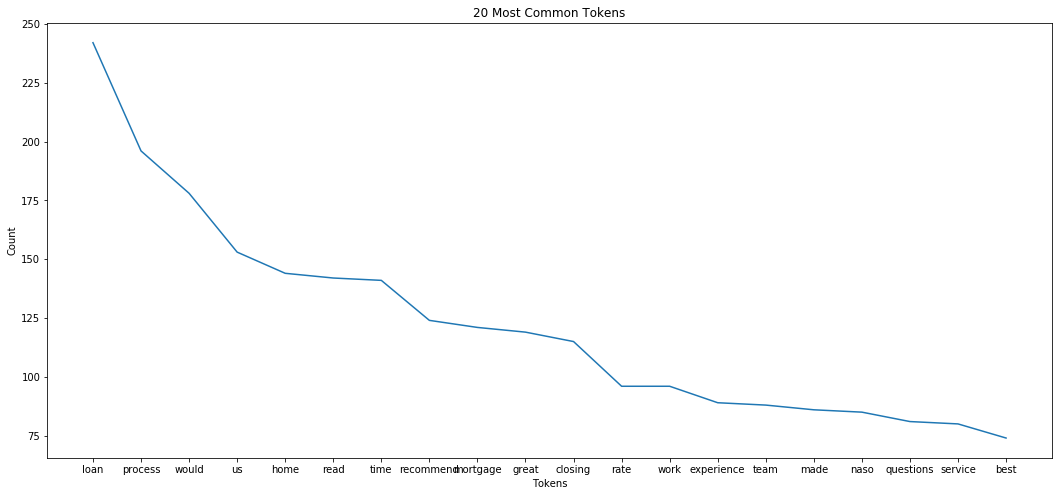

In [75]:
# 20 most common tokens
plt.figure(figsize=(18,8))
plt.plot('token','count',data=token_count_df[:20])
plt.xlabel('Tokens')
plt.ylabel('Count')
plt.title('20 Most Common Tokens')
plt.show()

### Visualization of most common words through word cloud

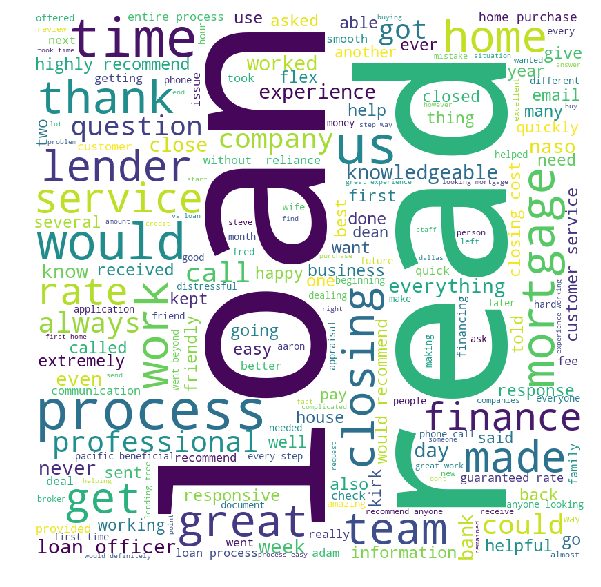

In [76]:
from wordcloud import WordCloud
words_list = []
for text in X_train:
    words_list = words_list + text.split()
whole_string = ' '.join(words_list)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stops, 
                min_font_size = 10).generate(whole_string) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Topic Modeling

In [79]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=50)
X_topics = lda_model.fit_transform(df_x_train_dtm)
topic_word = lda_model.components_ 
vocab = count_vector.get_feature_names()

In [131]:
# This DataFrame represents ratio of each topic in each document
docment_topic_df= pd.DataFrame(X_topics,columns=['Topic_1','Topic_2','Topic_3','Topic_4','Topic_5','Topic_6','Topic_7','Topic_8','Topic_9','Topic_10'])
docment_topic_df['Document_Number'] = np.arange(404)
docment_topic_df.index = docment_topic_df.Document_Number
docment_topic_df = docment_topic_df.drop(['Document_Number'],axis=1)
docment_topic_df.head(10)

,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10
Document_Number,,,,,,,,,,
0,0.005556,0.480222,0.060935,0.005556,0.005557,0.419948,0.005556,0.005557,0.005557,0.005556
1,0.004546,0.223005,0.298846,0.004547,0.200027,0.004547,0.004545,0.250844,0.004546,0.004547
2,0.003573,0.263606,0.282636,0.003572,0.003574,0.428751,0.003571,0.003572,0.003573,0.003572
3,0.006250,0.006251,0.006250,0.006251,0.006251,0.006251,0.006250,0.006251,0.006250,0.943745
4,0.003226,0.003227,0.003226,0.003227,0.502666,0.471524,0.003226,0.003227,0.003226,0.003226
5,0.006250,0.006251,0.006250,0.006251,0.006251,0.006251,0.006250,0.006251,0.006250,0.943745
6,0.001450,0.119562,0.083163,0.015945,0.001450,0.133558,0.001449,0.307939,0.334034,0.001450
7,0.025001,0.278115,0.025000,0.025000,0.025000,0.025004,0.025000,0.025002,0.025009,0.521868
8,0.003572,0.003572,0.299624,0.003572,0.003572,0.268521,0.003571,0.406852,0.003572,0.003572


In [143]:
topics_components = []
for x in range(10):
    topics_components.append(pd.Series(pd.DataFrame(topic_word,columns=vocab).iloc[0,:].sort_values(ascending = False)[:10].values,index=pd.DataFrame(topic_word,columns=vocab).iloc[x,:].sort_values(ascending = False)[:10].index.tolist()))

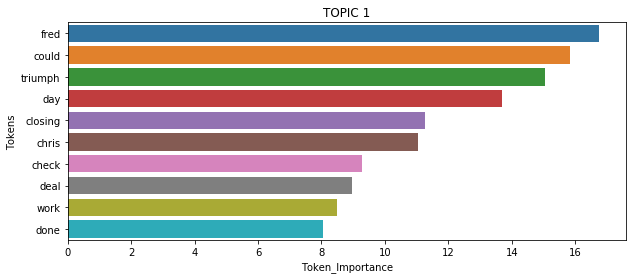

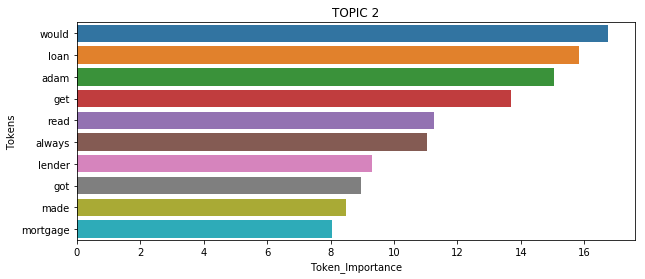

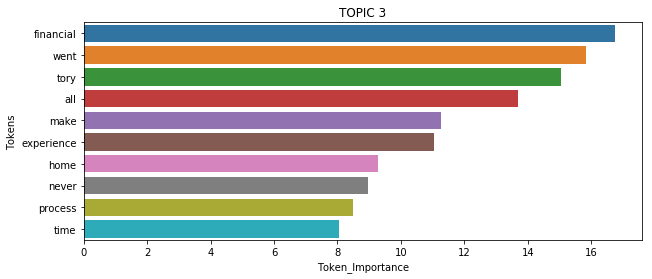

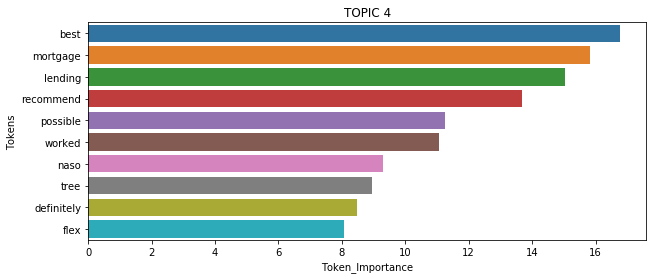

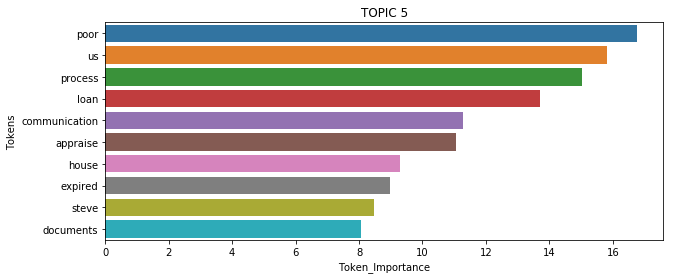

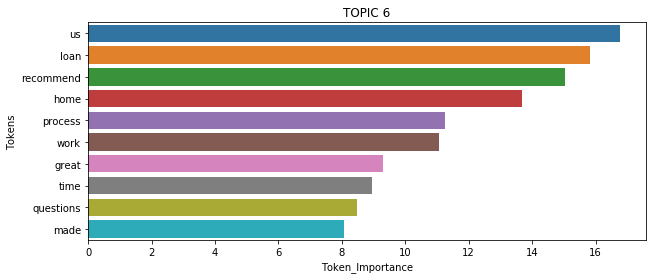

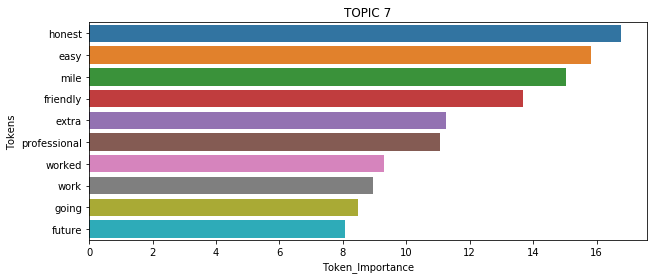

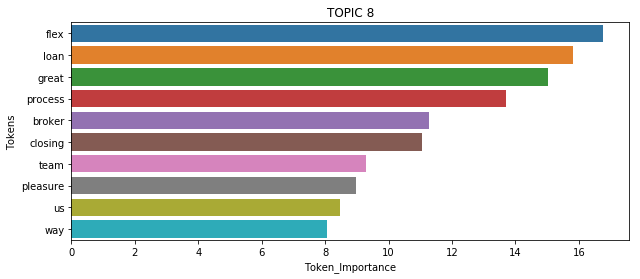

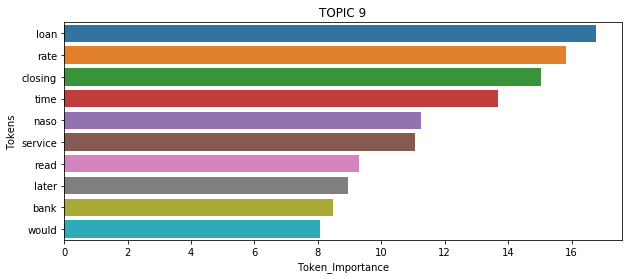

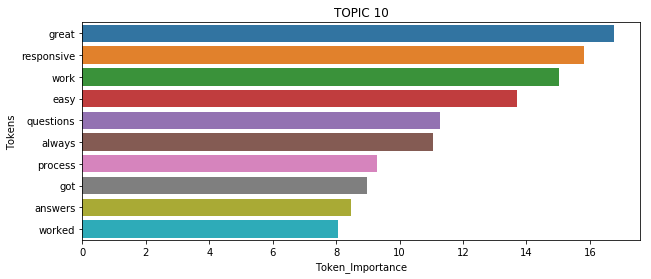

In [144]:
from matplotlib.backends.backend_pdf import PdfPages
bp = PdfPages('Ten_Imp_Tokens_Of_Each_Topic')

for i in range(10):
    fig,axes = plt.subplots(figsize=(10,4))
    plt.xlabel('Token_Importance')
    plt.ylabel('Tokens')
    sns.barplot(x=topics_components[i].values,y=topics_components[i].index)
    plt.title('TOPIC '+str(i+1) )
    bp.savefig(fig)
    
bp.close()   
# Ten Important Tokens Of Each Topic

## Vectorization for both train & test 

In [145]:
count_vector = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1,1),min_df=5 , max_features=800)
count_vector = count_vector.fit(X_train)
X_train_count = count_vector.transform(X_train) 
X_test_count = count_vector.transform(X_test)

#### Document-Term Matrix(DTM)

In [146]:
dtm = X_train_count.toarray()
dtm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [147]:
df_x_train_dtm = pd.DataFrame(dtm,columns=count_vector.get_feature_names())
df_x_train_dtm.head()

,aaron,able,absolutely,accept,accommodation,account,accurate,achieve,across,actual,...,working,works,would,wouldn,writing,wrong,wyndham,year,years,yet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
df_x_test_dtm = pd.DataFrame(X_test_count.toarray(),columns=count_vector.get_feature_names())
df_x_test_dtm.head()

,aaron,able,absolutely,accept,accommodation,account,accurate,achieve,across,actual,...,working,works,would,wouldn,writing,wrong,wyndham,year,years,yet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Term_Frequency-Inverse_Document_Frequency (TF-IDF)

In [150]:
tf_idf_tranformer = TfidfTransformer()
tf_idf_tranformer = tf_idf_tranformer.fit(X_train_count)
X_train_tf_idf = tf_idf_tranformer.transform(X_train_count)
tf_idf = X_train_tf_idf.toarray()
tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [151]:
df_x_train_tf_idf = pd.DataFrame(tf_idf,columns=count_vector.get_feature_names())
df_x_train_tf_idf.head()

,aaron,able,absolutely,accept,accommodation,account,accurate,achieve,across,actual,...,working,works,would,wouldn,writing,wrong,wyndham,year,years,yet
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.422614,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.282883,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.148744,0.0,0.0,0.0,0.0,0.205595,0.222938,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
df_x_test_tf_idf = pd.DataFrame(tf_idf_tranformer.transform(X_test_count).toarray(),columns=count_vector.get_feature_names())
df_x_test_tf_idf.head()

,aaron,able,absolutely,accept,accommodation,account,accurate,achieve,across,actual,...,working,works,would,wouldn,writing,wrong,wyndham,year,years,yet
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### N-gram(bi-gram) level TF-IDF

In [153]:
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1, 2), max_features=800)
tfidf_vect_ngram.fit(X_train)
X_train_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
df_x_train_tf_idf_n_gram = pd.DataFrame(X_train_tfidf_ngram.toarray(),columns= tfidf_vect_ngram.get_feature_names())
df_x_train_tf_idf_n_gram.head()

,aaron,able,able get,absolutely,accept,accommodation,account,accurate,across,actual,...,would recommend,wouldn,wouldn t,writing,wrong,wyndham,wyndham capital,year,years,yet
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.226937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.140006,0.0,0.0,0.0,0.0,0.0,0.193518,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
df_x_test_tf_idf_n_gram = pd.DataFrame(tfidf_vect_ngram.transform(X_test).toarray(),columns= tfidf_vect_ngram.get_feature_names())
df_x_test_tf_idf_n_gram.head()

,aaron,able,able get,absolutely,accept,accommodation,account,accurate,across,actual,...,would recommend,wouldn,wouldn t,writing,wrong,wyndham,wyndham capital,year,years,yet
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Building model using Naive Bayes

In [155]:
import sklearn.metrics as metrics
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB

In [156]:
clf = MultinomialNB().fit(df_x_train_dtm,y_train)
print('dtm train accuracy', metrics.accuracy_score(clf.predict(df_x_train_dtm),y_train))
print('dtm test accuracy', metrics.accuracy_score(clf.predict(df_x_test_dtm),y_test))

clf = MultinomialNB().fit(df_x_train_tf_idf,y_train)
print('tfidf train accuracy', metrics.accuracy_score(clf.predict(df_x_train_tf_idf),y_train))
print('tfidf test accuracy', metrics.accuracy_score(clf.predict(df_x_test_tf_idf),y_test))

clf = MultinomialNB().fit(df_x_train_tf_idf_n_gram,y_train)
print('tfidf_ngram train accuracy', metrics.accuracy_score(clf.predict(df_x_train_tf_idf_n_gram),y_train))
print('tfidf_ngram test accuracy', metrics.accuracy_score(clf.predict(df_x_test_tf_idf_n_gram),y_test))

dtm train accuracy 0.9801980198019802
dtm test accuracy 0.9900990099009901
tfidf train accuracy 0.948019801980198
tfidf test accuracy 0.900990099009901
tfidf_ngram train accuracy 0.9381188118811881
tfidf_ngram test accuracy 0.9108910891089109


In [157]:
# It can be observed that DTM outperforms other matrixes in terms of both train and test accuracy

## Buiding Final Model

In [160]:
y_train.value_counts()

5    330
1     74
Name: Stars, dtype: int64

In [162]:
clf = MultinomialNB().fit(df_x_train_dtm,y_train)

### Rating(Stars) Prediction

In [163]:
y_pred_train = clf.predict(df_x_train_dtm)
y_pred_test = clf.predict(df_x_test_dtm)

In [167]:
clf_train_pred = pd.DataFrame()
clf_train_pred['actual_rating'] = y_train
clf_train_pred['predicted_rating'] = y_pred_train
clf_test_pred = pd.DataFrame()
clf_test_pred['actual_rating'] = y_test
clf_test_pred['predicted_rating'] = y_pred_test

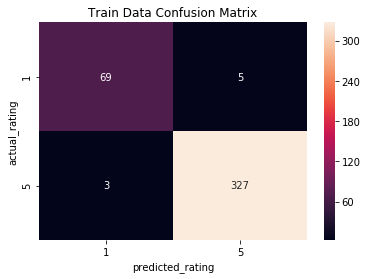

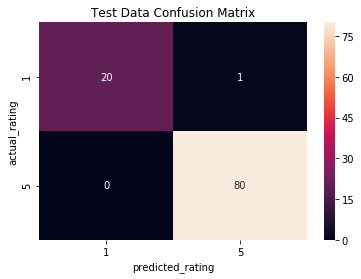

In [168]:
sns.heatmap(pd.crosstab(clf_train_pred['actual_rating'], clf_train_pred['predicted_rating']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()
sns.heatmap(pd.crosstab(clf_test_pred['actual_rating'], clf_test_pred['predicted_rating']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()

In [170]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(clf_train_pred['actual_rating'], clf_train_pred['predicted_rating']))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(clf_test_pred['actual_rating'], clf_test_pred['predicted_rating']))

The overall accuracy score for the Train Data is :  0.9801980198019802
The overall accuracy score for the Test Data  is :  0.9900990099009901


In [172]:
print(metrics.classification_report(clf_train_pred['actual_rating'], clf_train_pred['predicted_rating']))

              precision    recall  f1-score   support

           1       0.96      0.93      0.95        74
           5       0.98      0.99      0.99       330

   micro avg       0.98      0.98      0.98       404
   macro avg       0.97      0.96      0.97       404
weighted avg       0.98      0.98      0.98       404



In [173]:
print(metrics.classification_report(clf_test_pred['actual_rating'], clf_test_pred['predicted_rating']))

              precision    recall  f1-score   support

           1       1.00      0.95      0.98        21
           5       0.99      1.00      0.99        80

   micro avg       0.99      0.99      0.99       101
   macro avg       0.99      0.98      0.98       101
weighted avg       0.99      0.99      0.99       101



### Sentiment Prediction

In [ ]:
# Reviews with 5 stars can be considered as review with positive sentiement
# Reviews with 1 stars can be considered as review with negative sentiement

In [175]:
clf_train_pred['Orignal_Sentiment'] = clf_train_pred["actual_rating"].apply(lambda x: 'Negative' if x == 1 else 'Positive')
clf_train_pred['Predicted_Sentiment'] = clf_train_pred["predicted_rating"].apply(lambda x: 'Negative' if x == 1 else 'Positive')
clf_test_pred['Orignal_Sentiment'] = clf_test_pred["actual_rating"].apply(lambda x: 'Negative' if x == 1 else 'Positive')
clf_test_pred['Predicted_Sentiment'] = clf_test_pred["predicted_rating"].apply(lambda x: 'Negative' if x == 1 else 'Positive')

In [176]:
clf_train_pred.head()

,actual_rating,predicted_rating,Orignal_Sentiment,Predicted_Sentiment
102,1,1,Negative,Negative
50,5,5,Positive,Positive
367,5,5,Positive,Positive
34,5,5,Positive,Positive
78,5,5,Positive,Positive


In [177]:
clf_test_pred.head()

,actual_rating,predicted_rating,Orignal_Sentiment,Predicted_Sentiment
305,5,5,Positive,Positive
193,5,5,Positive,Positive
65,5,5,Positive,Positive
349,5,5,Positive,Positive
151,5,5,Positive,Positive


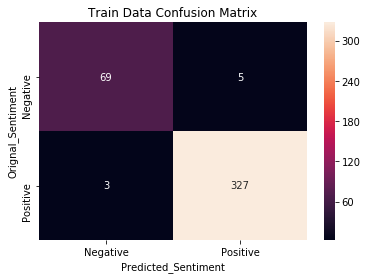

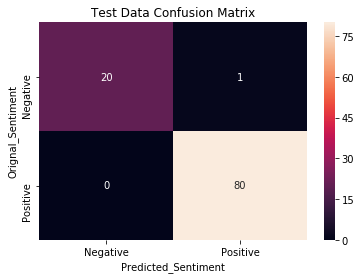

In [178]:
sns.heatmap(pd.crosstab(clf_train_pred['Orignal_Sentiment'], clf_train_pred['Predicted_Sentiment']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()
sns.heatmap(pd.crosstab(clf_test_pred['Orignal_Sentiment'], clf_test_pred['Predicted_Sentiment']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()

In [180]:
print(metrics.classification_report(clf_train_pred['Orignal_Sentiment'], clf_train_pred['Predicted_Sentiment']))

              precision    recall  f1-score   support

    Negative       0.96      0.93      0.95        74
    Positive       0.98      0.99      0.99       330

   micro avg       0.98      0.98      0.98       404
   macro avg       0.97      0.96      0.97       404
weighted avg       0.98      0.98      0.98       404



In [181]:
print(metrics.classification_report(clf_test_pred['Orignal_Sentiment'], clf_test_pred['Predicted_Sentiment']))

              precision    recall  f1-score   support

    Negative       1.00      0.95      0.98        21
    Positive       0.99      1.00      0.99        80

   micro avg       0.99      0.99      0.99       101
   macro avg       0.99      0.98      0.98       101
weighted avg       0.99      0.99      0.99       101

